In [15]:
import pandas as pd
import numpy as np
import math

In [16]:
df = pd.read_csv("/home/bethtian/fintech545/FinTech545_Spring2025/Projects/Project01/problem1.csv")
df_info = df.describe()
print(df_info)

                 X
count  1000.000000
mean      0.050198
std       0.101649
min      -0.293030
25%      -0.019959
50%       0.052596
75%       0.115794
max       0.413809


In [17]:
arr = np.array(df['X'])
# arr

# A. Calculate the Mean, Variance, Skewness and Kurtosis of the data

In [18]:
def calculateMoments(data):
    mean = np.mean(data)
    var = np.var(data)
    skewness = np.sum(((data-mean)/math.sqrt(var))**3)/len(data)
    kurtosis = np.sum(((data-mean)/math.sqrt(var))**4)/len(data) - 3
    return mean, var, skewness, kurtosis
mean, variance, skewness, kurtosis = calculateMoments(arr)
print(f"Mean: {mean:.4f}\nVariance: {variance:.4f}\nSkewness: {skewness:.4f}\nKurtosis: {kurtosis:.4f}")

Mean: 0.0502
Variance: 0.0103
Skewness: 0.1204
Kurtosis: 0.2229


# B. Given a choice between a Normal Distribution and a T-Distribution, which one would you choose to model the data? Why?

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

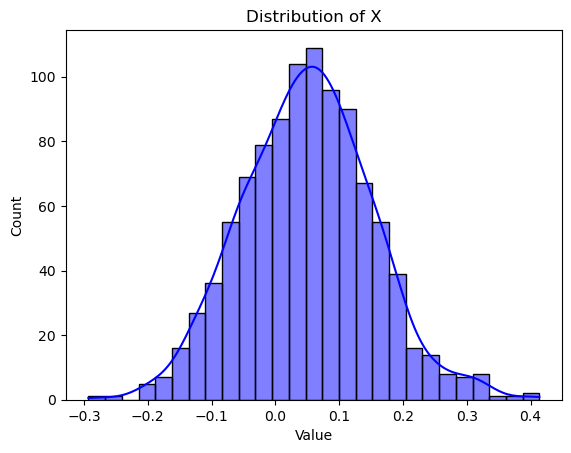

In [20]:

plt.figure()
sns.histplot(data =arr, kde = True, color = 'blue', alpha = 0.5)

plt.title('Distribution of X')
plt.xlabel('Value')
plt.ylabel('Count')
plt.show()

In [21]:
df_info

,X
count,1000.000000
mean,0.050198
std,0.101649
min,-0.293030
25%,-0.019959
50%,0.052596
75%,0.115794
max,0.413809


I would like to choose normal distribution. Given the question C, here I just give two reasons related to the data features and visualization.

1. According to the information about X, we can know that the amount of observations in X is 1000. This means X is a relative large sample. The standard deviation of X is 0.1 and there is no extreme high or low values.

2. The visualization of X shows that X does not have fat tail or very extreme values. The data also exhibits the symmetric and bell-shaped distribution.

# C.  Fit both distributions and prove or disprove your choice in B using methods presented in class.

## a. Fitting

In [22]:
from scipy import stats

In [23]:
# fit the normal distribution
mu,sigma = stats.norm.fit(arr)
print(f"The results of normal distribution: mu = {mu:.2f}, sigma = {sigma:.2f} ")

#fit the t distribution
df, loc, scale = stats.t.fit(arr)
print(f"The result of t distribution: df={df:.2f}, loc={loc:.2f}, scale={scale:.2f}")

The results of normal distribution: mu = 0.05, sigma = 0.10 
The result of t distribution: df=28.71, loc=0.05, scale=0.10


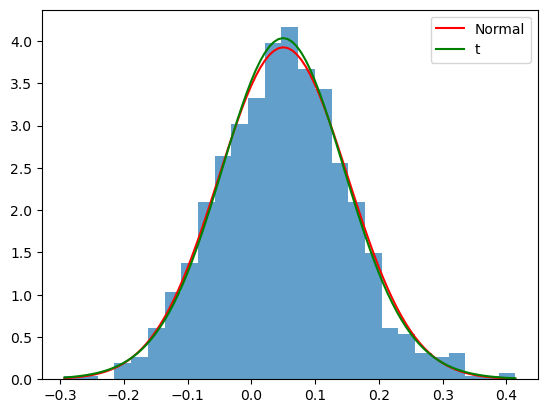

In [24]:
#Visualization
plt.figure()
plt.hist(arr, density = True, bins ="auto", alpha = 0.7 )

x_plot = np.linspace(min(arr), max(arr), 100)
plt.plot(x_plot, stats.norm.pdf(x_plot, mu,sigma), "r-", label = "Normal")
plt.plot(x_plot, stats.t.pdf(x_plot, df,loc,scale), "g-", label = "t")

plt.legend()
plt.show()

## b. Comparison

### b.1. Comparison through goodness of fit.

In [25]:
def Rsquare(x, dist, params):
    hist, bin_edges = np.histogram(x, bins = "auto", density = True)
    bin_centers = (bin_edges[:-1]+bin_edges[1:])/2
    
    y_pred = dist.pdf(x_plot, *params)    
    y_true = np.interp(x_plot, bin_centers, hist)
    
    ss_res = np.sum((y_true - y_pred) **2)
    ss_tot = np.sum((y_true - np.mean(y_true))**2)
    r2 = 1-(ss_res/ ss_tot)
    
    #adjusted r-square
    n = len(y_true)
    p = len(params)
    adj_r2 = 1-(1-r2)*(n-1)/(n-p-1)
    
    return r2, adj_r2

r2_norm, adj_r2_norm = Rsquare(arr, stats.norm, (mu, sigma))
r2_t, adj_r2_t = Rsquare(arr, stats.t, (df, loc, scale))

print(f"Normal: R² = {r2_norm:.4f}, Adj R² = {adj_r2_norm:.4f}")
print(f"t: R² = {r2_t:.4f}, Adj R² = {adj_r2_t:.4f}")
    

Normal: R² = 0.9935, Adj R² = 0.9934
t: R² = 0.9932, Adj R² = 0.9930


From result we can know that the R² and Adj R² of normal distribution are both higher than the t distribution. This means accoring to the R² and Adj R², normal distribution fits the data better.

### b.2. Comparison through AIC/BIC

In [26]:
def aicbic(x, dist, params):
    loglik = np.sum(dist.logpdf(x, *params))
    k = len(params)
    n = len(x)
    aic = 2*k -2*loglik
    bic = k* np.log(n) - 2*loglik
    return aic, bic

norm_aic, norm_bic = aicbic(arr, stats.norm, (mu, sigma))
t_aic, t_bic = aicbic(arr, stats.t, (df, loc, scale))

print(f"Normal distribution: AIC_norm={norm_aic:.2f}, BIC_norm={norm_bic:.2f}")
print(f"t distribution: AIC_t={t_aic:.2f}, BIC_t={t_bic:.2f}")


Normal distribution: AIC_norm=-1731.59, BIC_norm=-1721.77
t distribution: AIC_t=-1731.42, BIC_t=-1716.70


From the result of AIC and BIC of both distributions, we can find that both AIC and BIC of norm distribution are lower than that of t distribution. This means that the fitting result of norm distribution is better than t distribution. 


***Conclusion:***
Hence, the comparisons through goodness of fit and AICBIC indicate that the norm distribution fits data better.